In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [25]:
startup_data=pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [26]:
startup_data.shape

(50, 5)

In [27]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [28]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [29]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
startup_data.drop("State",axis=1,inplace=True)

## Assumption Test

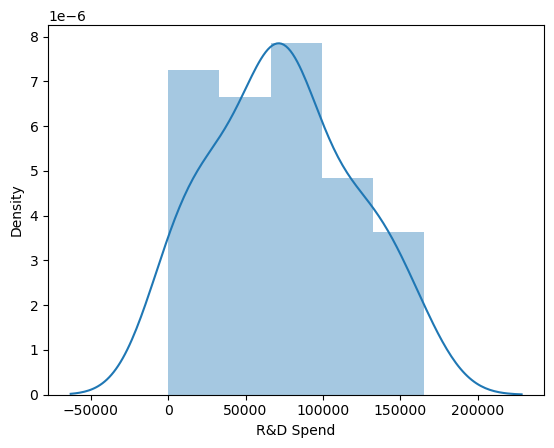

In [33]:
sns.distplot(startup_data["R&D Spend"])
plt.show()

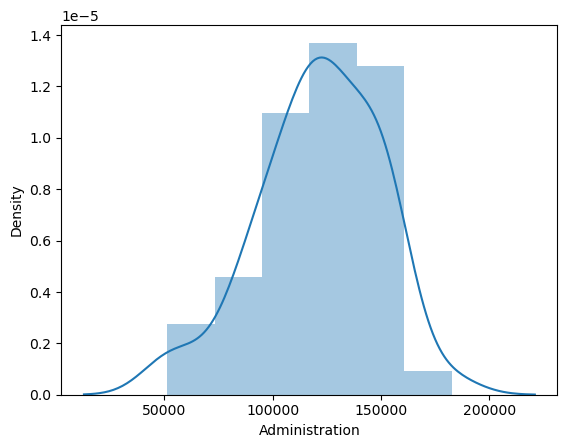

In [34]:
sns.distplot(startup_data["Administration"])
plt.show()

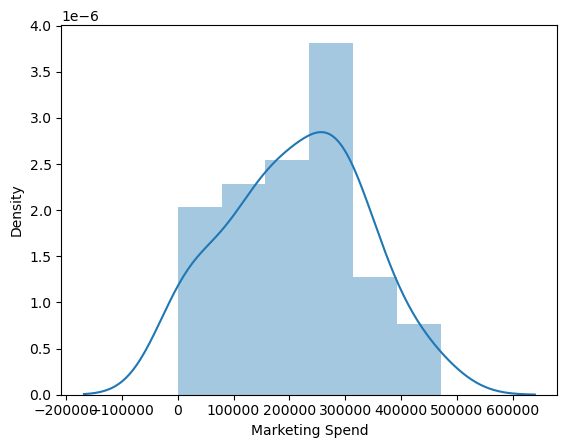

In [35]:
sns.distplot(startup_data["Marketing Spend"])
plt.show()

In [36]:
startup_data=startup_data.rename({"R&D Spend":"RDS","Marketing Spend":"Marketing_spend"},axis=1)
startup_data.head()

,RDS,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


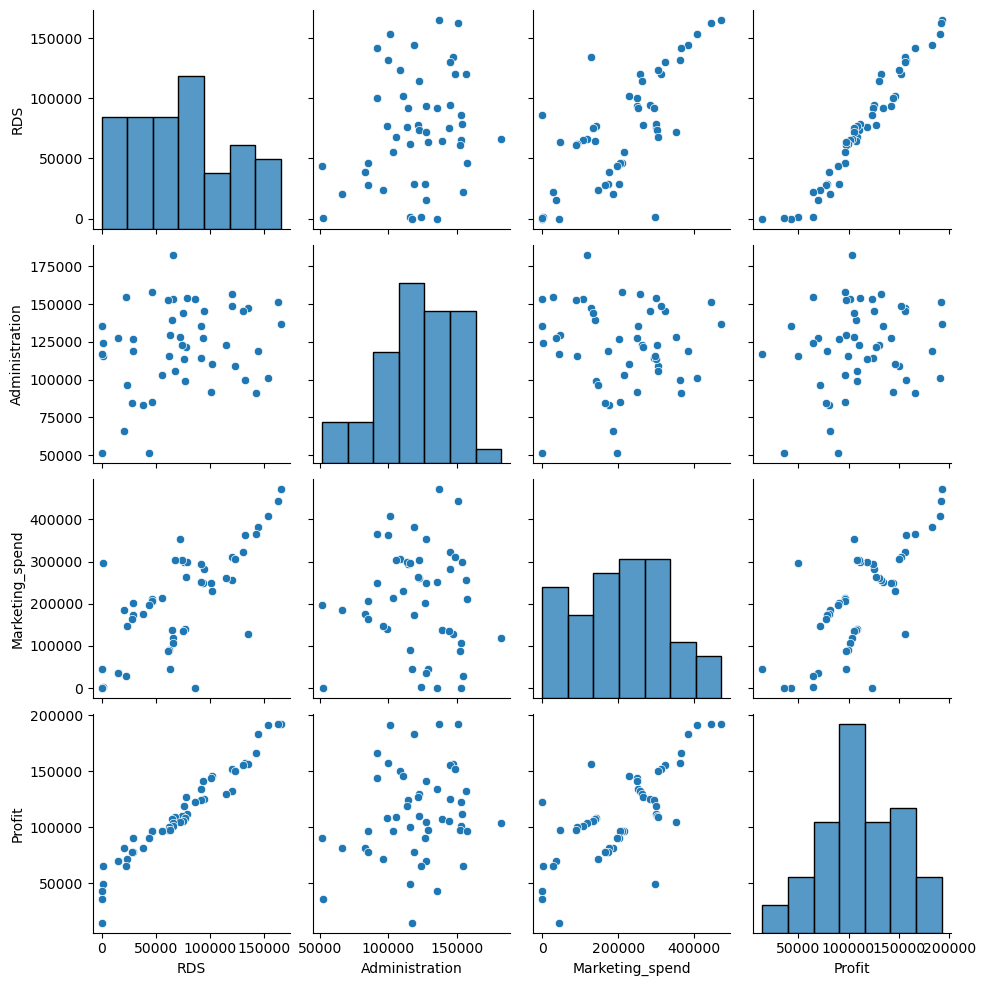

In [37]:
sns.pairplot(startup_data)
plt.show()

## collinearity Test

In [38]:
corr_matrix=startup_data.corr().round(2)
corr_matrix

,RDS,Administration,Marketing_spend,Profit
RDS,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing_spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


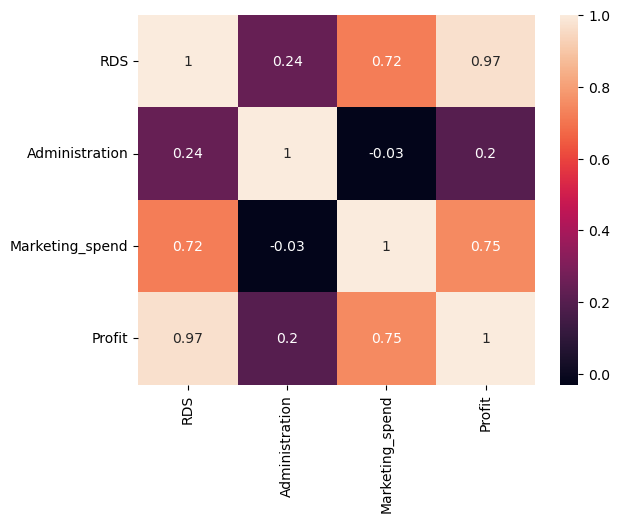

In [39]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

# model building

In [41]:
x=startup_data.drop('Profit',axis=1)
y=startup_data[['Profit']]

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [48]:
scaled_x=pd.DataFrame(data=scaled_x,columns=['RDS','Administration','Marketing_spend'])

In [49]:
scaled_x.mean()

RDS                1.199041e-16
Administration    -2.919887e-16
Marketing_spend   -9.325873e-17
dtype: float64

In [50]:
scaled_x.std()

RDS                1.010153
Administration     1.010153
Marketing_spend    1.010153
dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=.20,random_state=12)

In [52]:
x_train.shape,y_train.shape

((40, 3), (40, 1))

In [54]:
x_test.shape,y_test.shape

((10, 3), (10, 1))

## Model Training

In [56]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## Model Testing

In [58]:
y_pred_train=linear_model.predict(x_train)
y_pred_test=linear_model.predict(x_test)

## Model Evaluation

In [60]:
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
mean_squared_error(y_train,y_pred_train)

82418806.17198442

In [62]:
mean_squared_error(y_test,y_pred_test)

69164516.23450823

In [63]:
r2_score(y_train,y_pred_train)

0.9485205028772792

In [64]:
r2_score(y_test,y_pred_test)

0.9497398332848893

In [65]:
lin_model_1=smf.ols(formula="Profit~Administration",data=startup_data).fit()

In [66]:
lin_model_1.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [67]:
lin_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.162
Time:                        12:46:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##here administration have significant value

In [68]:
lin_model_2=smf.ols(formula="Profit~Marketing_spend",data=startup_data).fit()

In [69]:
lin_model_2.params

Intercept          60003.548816
Marketing_spend        0.246459
dtype: float64

In [70]:
lin_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        13:21:51   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##here  marketing_spend have significant value

In [71]:
lin_model_3=smf.ols(formula="Profit~Administration+Marketing_spend",data=startup_data).fit()

In [72]:
lin_model_3.params

Intercept          20224.429059
Administration         0.323673
Marketing_spend        0.248844
dtype: float64

In [73]:
lin_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        13:23:08   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
##here both administration and marketing_spend have significant value

# CALCULATING VIF

In [80]:
reg_rd=smf.ols("RDS~Administration+Marketing_spend",data=startup_data).fit().rsquared
vif_rd=1/(1-reg_rd)
reg_ad=smf.ols("Administration~RDS+Marketing_spend",data=startup_data).fit().rsquared
vif_ad=1/(1-reg_ad)
red_ms=smf.ols("Marketing_spend~Administration+RDS",data=startup_data).fit().rsquared
vif_ms=1/(1-red_ms)


In [84]:
vif_ms

2.3267732905308773

In [87]:
vif_table=pd.DataFrame({"features":["RDS","Administration","Marketing_spend"],"VIF":[vif_rd,vif_ad,vif_ms]})
vif_table

,features,VIF
0,RDS,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


In [ ]:
#from the above value vif is lesser correlated

# Detecting influencers/outliers


## cook's distance

In [88]:
influence_data=model_1.get_influence()
c,_=influence_data.cooks_distance

<StemContainer object of 3 artists>

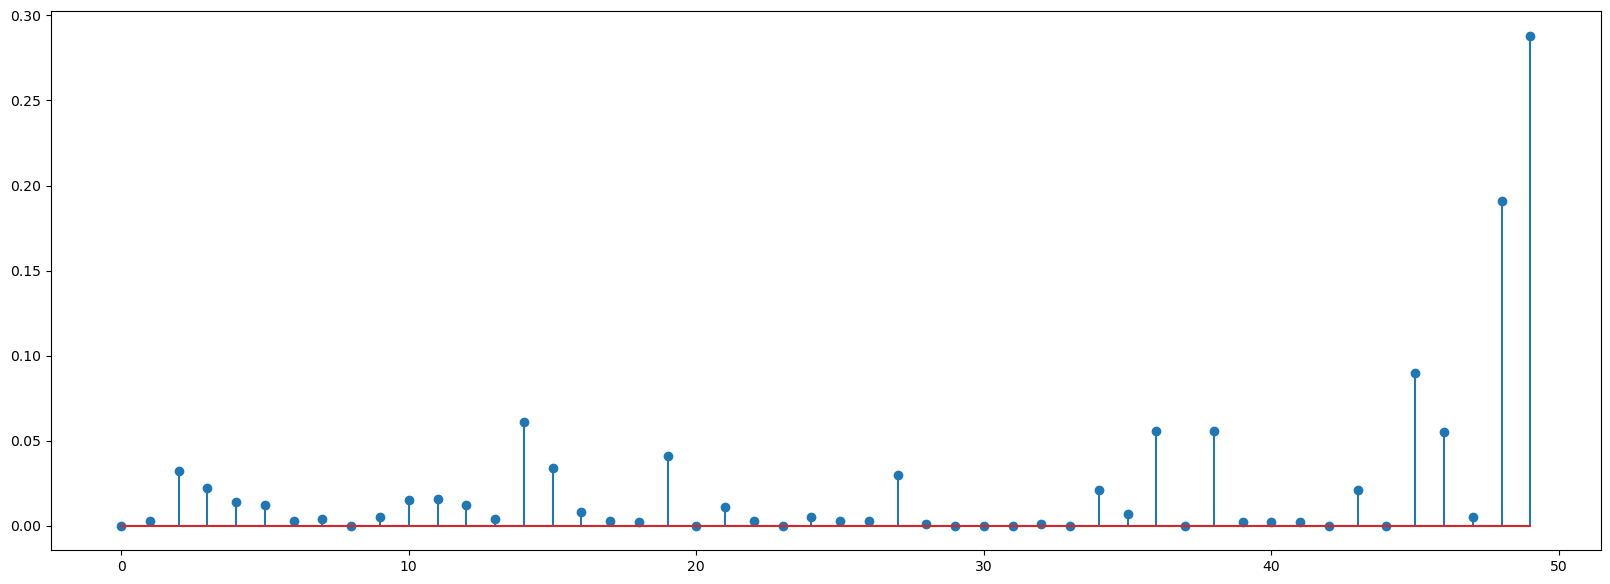

In [103]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,3))

In [104]:
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

In [105]:
#cook's distance shows that the 49 is the outlier


# High Influence Point

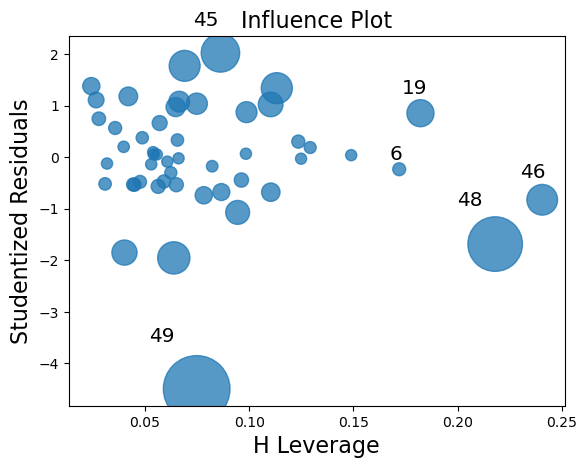

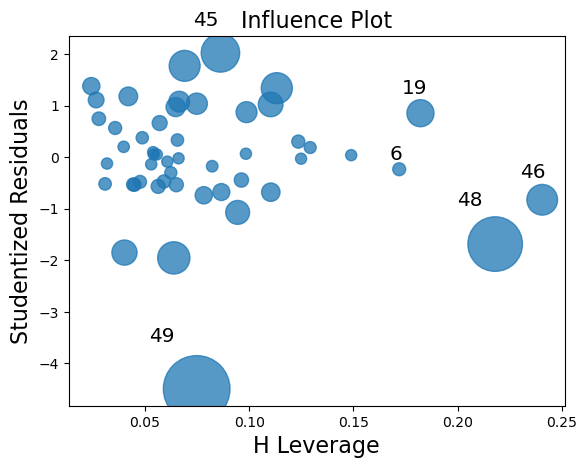

In [109]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_1)

In [75]:
startup_new=startup_data.copy()

In [76]:
startup_new=startup_data.drop(startup_new.index[49])

In [77]:
startup_new

,RDS,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Final Model

In [78]:
final_model=smf.ols(formula="Profit~RDS+Marketing_spend",data=startup_new).fit()

In [79]:
final_model.rsquared

0.9610856807456628

In [80]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           3.74e-33
Time:                        13:26:58   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS                 0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared value is increased in the final model(95 to 96) 

### dropped administration because it makes AIC value higher